In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/Level 2 OpenAQ Air Quality/openAQFeatureEngineered.csv')
df.head()

,country code,city,location,pollutant,source name,unit,value,country label,latitude,longitude,...,month,day,hour,unit ppm,unit ugm3,weekday,is weekend,season,val lat,val lon
0,US,Salem,Woodburn Chemeketa C,PM2.5,AirNow,µg/m³,2.6,United States,45.143141,-122.854708,...,5,23,0,False,True,1,False,spring,117.372167,-319.422241
1,CO,Unknown,MED-EXSA - Exito San Antonio - Medellin,PM10,Medellin,µg/m³,59.0,Colombia,6.249333,-75.570251,...,10,24,21,False,True,3,False,autumn,368.710671,-4458.644838
2,US,Jacksonville,Pepsi Place,PM2.5,AirNow,µg/m³,12.9,United States,30.262808,-81.606834,...,5,31,0,False,True,2,False,spring,390.390223,-1052.728159
3,US,Moscow,Moscow,PM2.5,AirNow,µg/m³,5.0,United States,46.728199,-116.954597,...,5,27,1,False,True,5,True,spring,233.640995,-584.772985
4,US,Santa Barbara-Santa Maria,Santa Ynez,PM2.5,AirNow,µg/m³,11.0,United States,34.605819,-120.075060,...,4,12,21,False,True,2,False,spring,380.664009,-1320.825660


In [2]:
# info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33020 entries, 0 to 33019
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country code   33020 non-null  object 
 1   city           33020 non-null  object 
 2   location       33018 non-null  object 
 3   pollutant      33020 non-null  object 
 4   source name    33020 non-null  object 
 5   unit           33020 non-null  object 
 6   value          33020 non-null  float64
 7   country label  33020 non-null  object 
 8   latitude       33020 non-null  float64
 9   longitude      33020 non-null  float64
 10  year           33020 non-null  int64  
 11  month          33020 non-null  int64  
 12  day            33020 non-null  int64  
 13  hour           33020 non-null  int64  
 14  unit ppm       33020 non-null  bool   
 15  unit ugm3      33020 non-null  bool   
 16  weekday        33020 non-null  int64  
 17  is weekend     33020 non-null  bool   
 18  season

In [3]:
# basic stats
statsTable = df.describe(include=['float', 'int'])
statsTable = statsTable.round(2)
statsTable

,value,latitude,longitude,year,month,day,hour,weekday,val lat,val lon
count,33020.00,33020.00,33020.00,33020.00,33020.00,33020.00,33020.00,33020.00,33020.00,33020.00
mean,585.17,30.94,55.99,2022.22,7.24,17.32,10.03,1.33,22977.36,22015.04
std,23370.29,17.96,86.78,1.69,1.80,9.46,5.98,1.73,947849.13,705715.91
min,-18798.12,-45.58,-161.77,2014.00,3.00,1.00,0.00,0.00,-218342.39,-431915.55
25%,0.01,29.20,17.63,2021.00,5.00,9.00,8.00,0.00,0.00,0.00
50%,6.00,35.13,104.15,2023.00,8.00,17.00,12.00,0.00,177.20,102.90
75%,26.00,39.77,121.53,2024.00,9.00,24.00,12.00,2.00,825.33,1708.12
max,1843611.00,70.13,153.35,2024.00,10.00,31.00,23.00,6.00,75798768.46,53191751.27


In [4]:
# checking na values
df.isna().sum()

,0
country code,0
city,0
location,2
pollutant,0
source name,0
unit,0
value,0
country label,0
latitude,0
longitude,0


In [5]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

### Distribution of the Target Variable (value): normal and cumulative

Text(0.5, 1.0, 'Value Distribution - Cumulative')

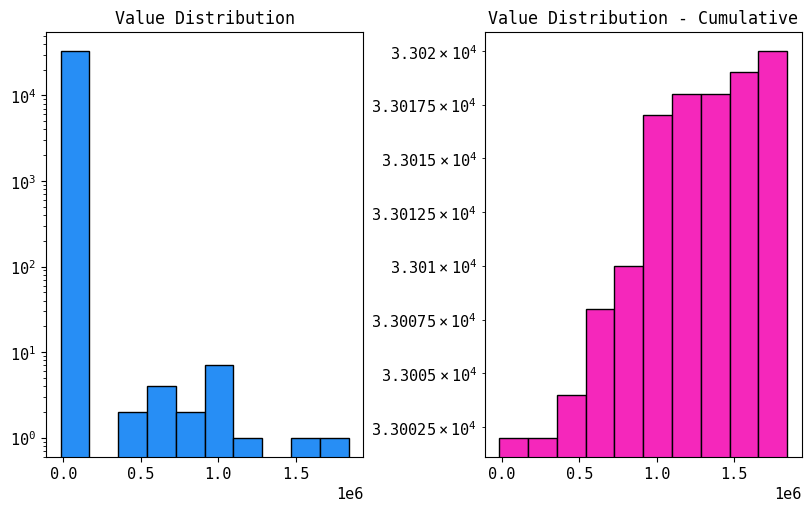

In [6]:
# setting plot params
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), constrained_layout=True)

axes[0].hist(df['value'], edgecolor='black', color='#278EF5')
axes[0].set_yscale('log')
axes[0].set_title('Value Distribution')

axes[1].hist(df['value'], edgecolor='black', color='#F527BB', cumulative=True)
axes[1].set_yscale('log')
axes[1].set_title('Value Distribution - Cumulative')

### Pollutant Breakdown

In [7]:
# unique values
df.pollutant.unique()

array(['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'NO', 'NOX',
       'TEMPERATURE', 'RELATIVEHUMIDITY', 'UM003', 'PM1', 'BC'],
      dtype=object)

In [8]:
# unique values count
df.pollutant.nunique()

13

Text(0.5, 0.98, 'Pollutants % Total')

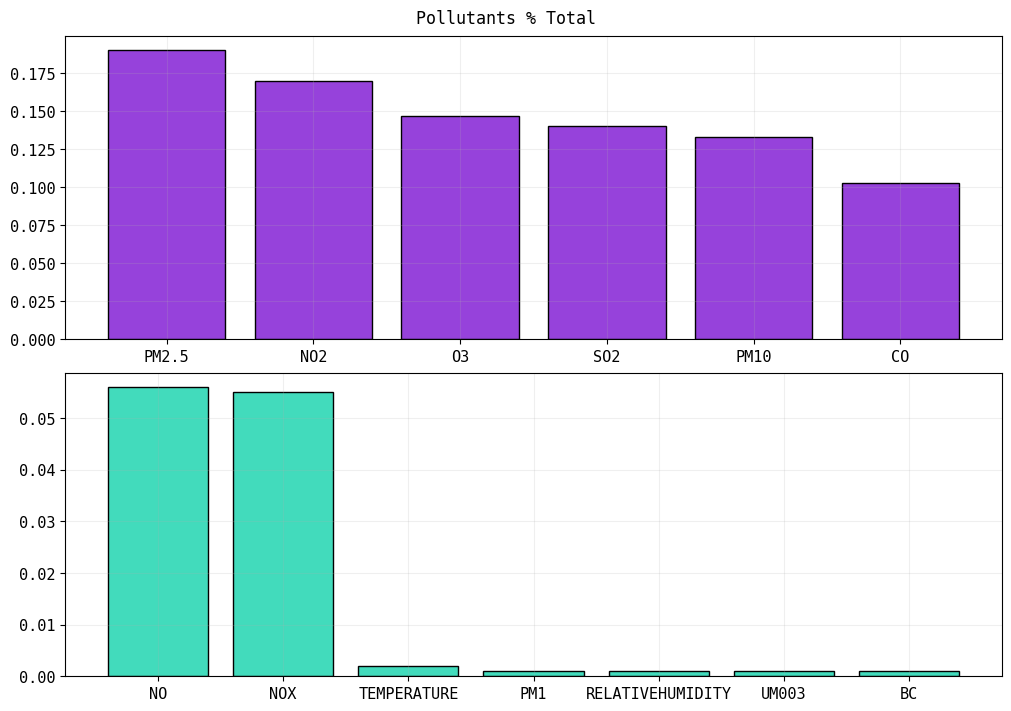

In [9]:
# counts
pollutantCounts = df.pollutant.value_counts(normalize=True, ascending=False, dropna=True)
pollutantCounts = pollutantCounts.round(3)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), constrained_layout=True)
axes[0].bar(pollutantCounts.iloc[0:6].index, pollutantCounts.iloc[0:6].values,
            ec="black", color="#9642DB")
axes[0].grid(alpha=0.2)
axes[1].bar(pollutantCounts.iloc[6:].index, pollutantCounts.iloc[6:].values,
            ec="black", color="#42DBBC")
axes[1].grid(alpha=0.2)
plt.suptitle("Pollutants % Total")

In [10]:
pollutantCounts

,proportion
pollutant,
PM2.5,0.190
NO2,0.170
O3,0.147
SO2,0.140
PM10,0.133
CO,0.103
NO,0.056
NOX,0.055
TEMPERATURE,0.002


### Temporal Patterns

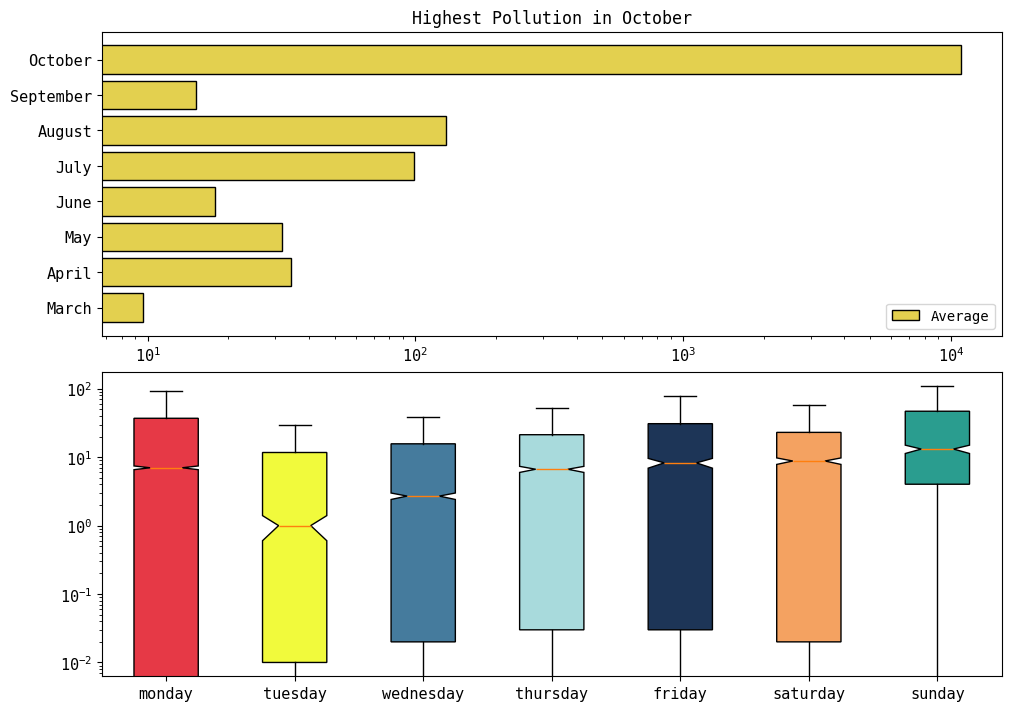

In [17]:
# average pollution level by month
# boxplots of pollution by weekday
avgPollutionMonth = df.groupby('month')['value'].mean()
pollutionsWeekday = {
    'monday': df.loc[df.weekday == 0]['value'].values,
    'tuesday': df.loc[df.weekday == 1]['value'].values,
    'wednesday': df.loc[df.weekday == 2]['value'].values,
    'thursday': df.loc[df.weekday == 3]['value'].values,
    'friday': df.loc[df.weekday == 4]['value'].values,
    'saturday': df.loc[df.weekday == 5]['value'].values,
    'sunday': df.loc[df.weekday == 6]['value'].values,
}
boxplotColors = ["#E63946", "#F1FA3C", "#457B9D", "#A8DADC", "#1D3557", "#F4A261", "#2A9D8F"]
months = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7),
                         constrained_layout=True)
axes[0].barh(avgPollutionMonth.index, avgPollutionMonth.values, ec="black",
             color="#E3D04F", label="Average")
axes[0].set_xscale('log')
axes[0].set_title('Highest Pollution in October')
axes[0].set_yticks([3, 4, 5, 6, 7, 8, 9, 10], months)
axes[0].legend(loc='best')

boxplotPollution = axes[1].boxplot(list(pollutionsWeekday.values()), tick_labels=list(pollutionsWeekday.keys()),
                showfliers=False, notch=True, patch_artist=True)
axes[1].set_yscale('log')
axes[1].set_title('')

for patch, color in zip(boxplotPollution['boxes'], boxplotColors):
  patch.set_facecolor(color)

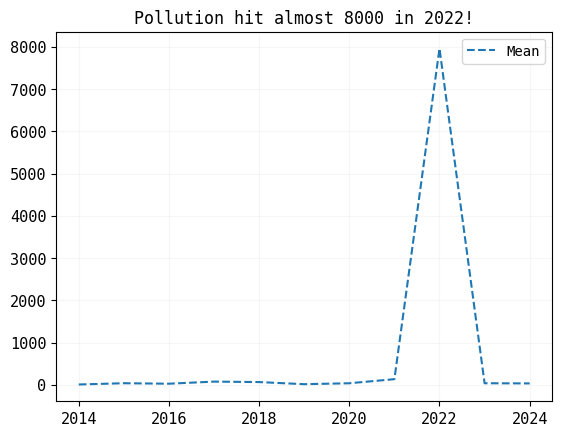

In [12]:
# pollution trend over time
avgPollutionYear = df.groupby('year')['value'].mean()

plt.plot(avgPollutionYear.index, avgPollutionYear.values, lw=1.5,
         linestyle="--", label="Mean")
plt.title('Pollution hit almost 8000 in 2022!')
plt.legend(loc='best')
plt.grid(alpha=0.1)

### Geographic Distribution

Text(0, 0.5, 'Latitude')

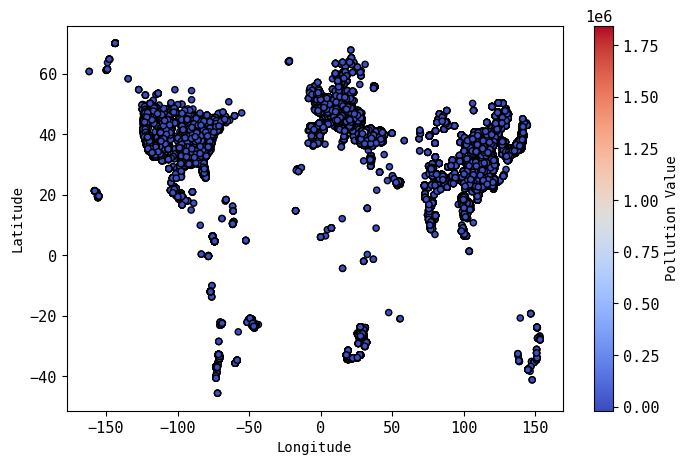

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(df['longitude'], df['latitude'], c=df['value'], cmap='coolwarm',
            s=20, edgecolor="black")
plt.colorbar(label="Pollution Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Country-level Insights

/tmp/ipython-input-4074111466.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(getPollutionValuesPerCode(code), labels=[code],
/tmp/ipython-input-4074111466.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(getPollutionValuesPerCode(code), labels=[code],
/tmp/ipython-input-4074111466.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(getPollutionValuesPerCode(code), labels=[code],
/tmp/ipython-input-4074111466.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9

Text(0.5, 0.98, 'Top 10 Pollutions')

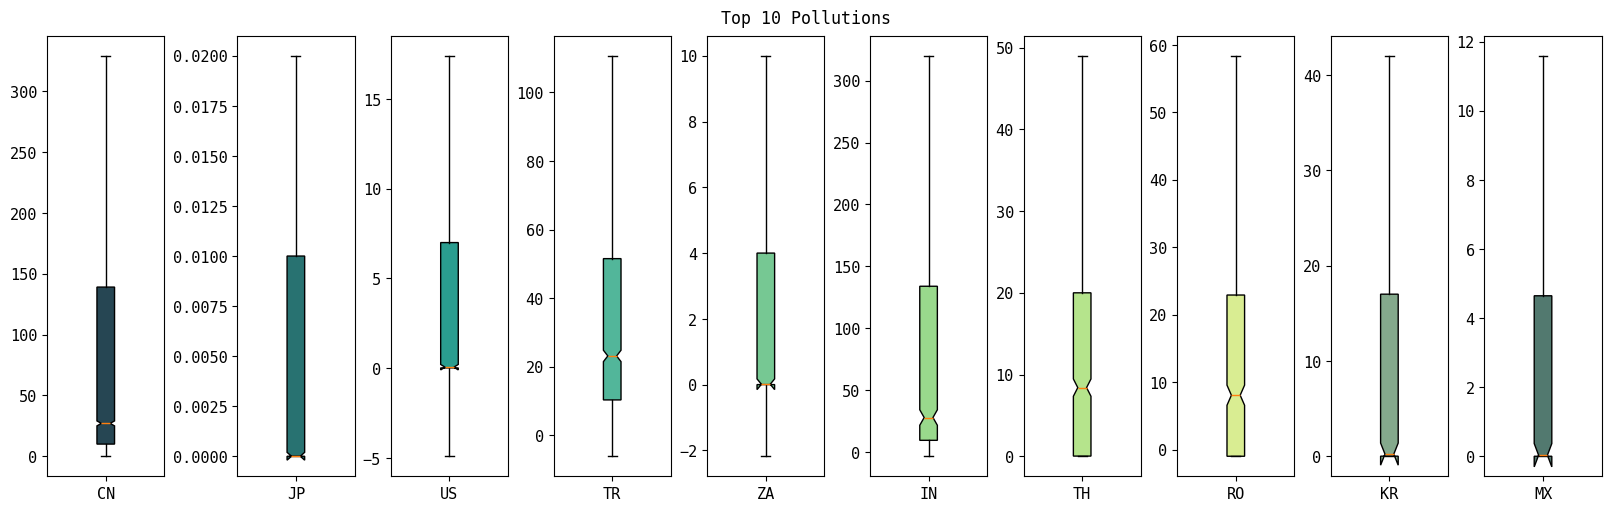

In [14]:
topCountriesCode = df['country code'].value_counts().nlargest(10, keep='first')
countryBoxplotColors = ["#264653", "#287271", "#2A9D8F", "#52B69A", "#76C893",
    "#99D98C", "#B5E48C", "#D9ED92", "#84A98C", "#52796F"]

def getPollutionValuesPerCode(code: str) -> list:
  return df[df['country code'] == code]['value'].values

fig, axes = plt.subplots(nrows=1, ncols=len(topCountriesCode.index),
                         figsize=(16, 5), constrained_layout=True)

for i, code in enumerate(topCountriesCode.index):
  boxplot = axes[i].boxplot(getPollutionValuesPerCode(code), labels=[code],
                            notch=True, patch_artist=True, showfliers=False)
  boxplot['boxes'][0].set_facecolor(countryBoxplotColors[i])

plt.suptitle('Top 10 Pollutions')

### Pivot Table: Pollutant Per Country

In [15]:
pivotT = df.pivot_table(index='country label', values='value', aggfunc='mean')
pivotT.columns = ['Mean Pollution']
pivotT

,Mean Pollution
country label,
Afghanistan,-431.500000
Antigua and Barbuda,10.000000
Argentina,193.521786
Armenia,10.400000
Australia,-8.547935
...,...
United States,5.663760
Unknown,-13.648762
Uzbekistan,7.005000


### Pollution Over Time

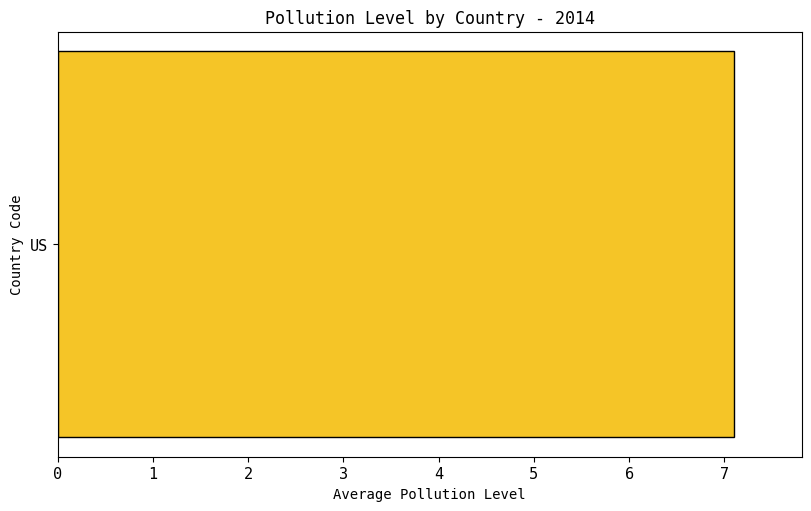

In [16]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# Average pollution per country per year
topCodes = df['country code'].value_counts().nlargest(10).index
dfAvg = df[df['country code'].isin(topCodes)].groupby(['year', 'country code'])['value'].agg('mean').reset_index()

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 5))
ax.set_xlim(0, max(dfAvg['value']) * 1.1)
ax.set_xlabel("Average Pollution Level")
ax.set_ylabel("Country Code")
title = ax.set_title("")

def animate(year):
  ax.clear()
  data = dfAvg[dfAvg['year'] == year]
  ax.barh(data['country code'], data['value'], edgecolor="black", color="#F5C527")
  ax.set_xlim(0, max(data['value']) * 1.1)
  ax.set_xlabel('Average Pollution Level')
  ax.set_ylabel(f"Country Code")
  ax.set_title(f"Pollution Level by Country - {year}")

anim = FuncAnimation(
    fig=fig,
    func=animate,
    frames=sorted(dfAvg['year'].dropna().unique()),
    interval=1500
)
anim

### Conclusions

-Most common pollutants: The dataset is dominated by PM2.5, NO₂ and O₃.
Less frequently measured pollutants include Relative Humidity, UM003, and BC (Black Carbon).

-Seasonal trend: The highest average pollution levels were observed in October, with minimal variation between weekdays.

-Yearly trend: The average pollution value reached a peak in 2022, with readings approaching 8,000 µg/m³, compared to a stable average below 400 µg/m³ in previous years.

-Geographic distribution: China (CN) and Japan (JP) recorded the highest concentration of pollutants, followed by the United States (US).